In [174]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [201]:
june_df = pd.read_csv('June_30DB.csv')
june_df['DateTime'] = pd.to_datetime(june_df['DateTime'])
june_df['Month'] = 'June'
july_df = pd.read_csv('July_30DB.csv')
july_df['DateTime'] = pd.to_datetime(july_df['DateTime'])
july_df['Month'] = 'July'
aug_df = pd.read_csv('Aug_30DB.csv')
aug_df['DateTime'] = pd.to_datetime(aug_df['DateTime'])
aug_df['Month'] = 'August'
sept_df = pd.read_csv('Sep_30DB.csv')
sept_df['DateTime'] = pd.to_datetime(sept_df['DateTime'])
sept_df['Month'] = 'September'

month_dfs = [june_df, july_df, aug_df, sept_df]

In [202]:
def parse_datetime(date_str):
    return datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S")

In [203]:
def tubes_ls():
    """
    returns a list of all tubes
    :return: 
    """
    tubes = ['Tube_1', 'Tube_2', 'Tube_3', 'Tube_4',
       'Tube_5', 'Tube_6', 'Tube_7', 'Tube_8', 'Tube_9', 'Tube_10', 'Tube_11',
       'Tube_12', 'Tube_13', 'Tube_14', 'Tube_15', 'Tube_16', 'Tube_17',
       'Tube_18', 'Tube_19', 'Tube_20', 'Tube_21', 'Tube_22', 'Tube_23',
       'Tube_24', 'Tube_25', 'Tube_26', 'Tube_27', 'Tube_28', 'Tube_29',
       'Tube_30', 'Tube_31', 'Tube_32']
    return tubes

In [204]:
def remove_dead(df, hours, count):

    end = df.DateTime.max()
    start = end - timedelta(hours=int(hours))
    
    conditions = df['condition'].unique()
    
    final_subset_df = pd.DataFrame()
    
    for con in conditions:
        #print("Condition: " + con)
        alive_count = 0
        dead_count = 0
        df_subset = df.loc[(df['DateTime'] >= start) & (df['DateTime'] < end) & (df['condition'] == con)]
        con_df = df.loc[df['condition'] == con]
        for tube in tubes_ls():
            #print("Tube: " + tube + " had " + str(df_subset[tube].sum()) + " counts")
            if df_subset[tube].sum() >= int(count):
                alive_count += 1
            else:
                dead_count += 1
                con_df = con_df.drop(columns=[tube])
        print(con +": " + 'Alive-' + str(alive_count) + " Dead-" + str(dead_count))
        
        final_subset_df = pd.concat([final_subset_df, con_df], ignore_index=True)
    
    return final_subset_df

In [205]:
subset_dfs = []
for df in month_dfs:
    subset_dfs.append(remove_dead(df, 24, 50))

VSV_JUN: Alive-4 Dead-28
BTV_JUN: Alive-4 Dead-28
PBS_JUN: Alive-23 Dead-9
CTRL_JUN: Alive-11 Dead-21
BTV_JUL: Alive-17 Dead-15
VSV_JUL: Alive-9 Dead-23
CTRL_JUL: Alive-24 Dead-8
PBS_JUL: Alive-23 Dead-9
PBS_AUG: Alive-23 Dead-9
BTV_AUG: Alive-25 Dead-7
VSV_AUG: Alive-19 Dead-13
CTRL_AUG: Alive-20 Dead-12
CTRL_SEP: Alive-18 Dead-14
VSV_SEP: Alive-12 Dead-20
PBS_SEP: Alive-12 Dead-20
BTV_SEP: Alive-20 Dead-12


In [206]:
for df in subset_dfs:
    print(df.describe())

       Unnamed: 0             DateTime      Tube_4     Tube_15     Tube_22  \
count  768.000000                  768  384.000000  576.000000  384.000000   
mean   383.500000  2024-06-10 05:15:00   39.648438   21.815972   23.325521   
min      0.000000  2024-06-08 05:30:00    0.000000    0.000000    0.000000   
25%    191.750000  2024-06-09 05:22:30    0.000000    0.000000    0.000000   
50%    383.500000  2024-06-10 05:15:00    0.000000    0.000000    0.000000   
75%    575.250000  2024-06-11 05:07:30   15.000000   11.000000    8.000000   
max    767.000000  2024-06-12 05:00:00  666.000000  428.000000  373.000000   
std    221.846794                  NaN  102.171994   58.024230   56.113004   

          Tube_23      Tube_1      Tube_3     Tube_29     Tube_32  ...  \
count  384.000000  576.000000  384.000000  192.000000  192.000000  ...   
mean    18.666667   15.451389   12.270833    3.515625   12.270833  ...   
min      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
2

In [207]:
subset_timefix = []
for df in subset_dfs:
    df = df.sort_values(by='DateTime')
    df['timepoint'] = df['DateTime'].astype('category').cat.codes
    subset_timefix.append(df)

In [208]:
def meltdf_timepoint(df):
    # Specify the columns you want to keep as metadata
    metadata_columns = ['condition', 'datatype', 'timepoint', 'Month']
    
    # Identify all tube columns (assuming they follow a naming convention)
    tube_columns = [col for col in df.columns if 'Tube_' in col]
    
    # Melt the DataFrame
    melted_df = pd.melt(df, id_vars=metadata_columns, value_vars=tube_columns,
                        var_name='Tube', value_name='Value')
    
    return melted_df

In [209]:
melted_dfs = []
for df in subset_timefix:
    melt =meltdf_timepoint(df)
    melted_dfs.append(melt)

In [210]:
concat_melted_df = pd.DataFrame()

for df in melted_dfs:
   concat_melted_df = pd.concat([concat_melted_df, df], ignore_index=True)
   
concat_melted_df.dropna(inplace=True)

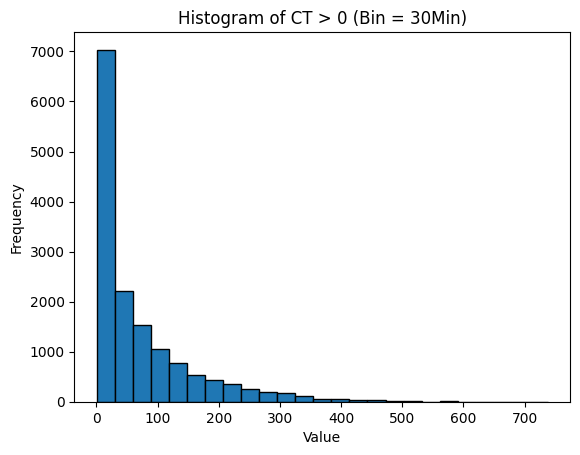

In [216]:
# Sample data list
data = concat_melted_df['Value'].tolist()

filtered_data = [x for x in data if x >= 1 ]

# Create histogram
plt.hist(filtered_data, bins=25, edgecolor='black')  # You can adjust 'bins' as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of CT > 0 (Bin = 30Min)')

# Save the plot as a PNG file
plt.savefig('histogram_CT (30min).png', format='png')

plt.show()

In [198]:
concat_melted_df.to_csv("Monthly_melt_5min.csv", index=False)